# Laboratorium 4
## Interpolacja

In [1]:
using Plots
using Polynomials
using DataFrames
using Statistics

#### Napisać własną implementację interpolacji wielomianowej stosując wprost wzór na wielomian interpolacyjny Lagrange'a . Przetestować swoją implementację na wylosowanych węzłach interpolacji w wybranym przedziale. Narysować wykres wielomianu interpolacyjnego w tym przedziale wraz z wezlami interpolacji

In [2]:
function lagrange_interpl(x_values, y_values, xs)
    n = length(x_values)
    ys = zeros(length(xs))
    for i = 1:n
        p = ones(length(xs))
        for j = 1:n
            if i == j
                continue
            end
            p = p .* ((xs .- x_values[j]) / (x_values[i] - x_values[j]))
        end
    ys = ys .+ y_values[i] .* p
    end
    return ys
end

lagrange_interpl (generic function with 1 method)

In [3]:
x = sort(rand(20) * 10)
y = cos.(x)
xs = range(0, 10, length=1000)
P = lagrange_interpl(x, y, xs)

1000-element Vector{Float64}:
  0.9999977098632371
  0.9999350277357735
  0.9997817595285596
  0.9995246381586185
  0.9991714329153183
  0.9987795047200052
  0.9981599511374952
  0.9975919189091655
  0.9967755127072451
  0.995915277468157
  0.9949565497954609
  0.9939889786401181
  0.9928218718923745
  ⋮
 -0.8937713680263304
 -0.889236947440633
 -0.8846134252716364
 -0.8799012655355138
 -0.8751009415835309
 -0.8702129306758497
 -0.8652377255128485
 -0.8601758250128526
 -0.8550277340594228
 -0.8497939714571174
 -0.8444750565952148
 -0.8390715296092743

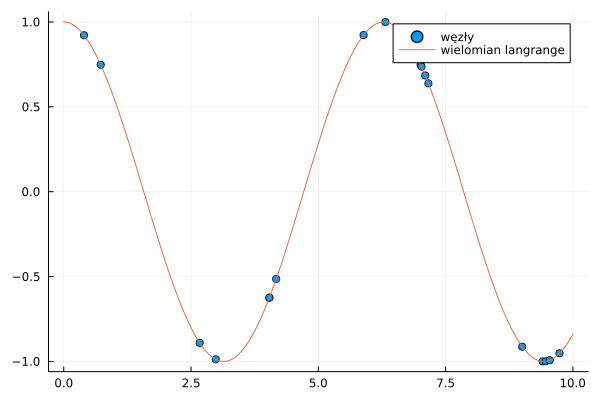

In [4]:
scatter(x,y,label="węzły")
plot!(xs, P, label="wielomian langrange")

#### Zrobic to samo dla metody Newtona (metoda ilorazów róznicowych).Narysować wykres wielomianu interpolacyjnego otrzymanego metodą Newtona dla tych samych danych, co w poprzednim punkcie. Zadbać o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji, według schematu z pakietu Interpolations http://juliamath.github.io/Interpolations.jl/stable/interpolations/ :
napisać funkcję NewtonInterpolation, która wylicza ilorazy różnicowe i zwraca "obiekt interpolacyjny" newt
napisać funkcję która wylicza wartość wielomianu dla obiektu newt w punkcie x za pomocą schematu Hornera dla postaci Newtona (2 pkt)

In [5]:
function newton_interpl(x_values, y_values)
    T = Float64[]
    n = length(x_values)
    for i in 1:n
        push!(T, y_values[i])
        for j in 1:i-1
            nom = T[end]-T[end-i+1]
            den = x_values[i] - x_values[i - j]
            push!(T, nom/den)
        end
    end
    newt = Float64[]
    k = 0
    for j in 1:n
        k += j
        push!(newt, T[k])
    end
    return newt
end

newton_interpl (generic function with 1 method)

In [6]:
function newton(newt, x_values, xs)
    n = length(x_values)
    b = newt[n]
    for i = 1:n-1
        b = newt[n - i] + b * (xs - x_values[n - i])
    end
    return b
end

newton (generic function with 1 method)

In [7]:
newton_res = [newton(newton_interpl(x,y), x, x_i) for x_i in xs]

1000-element Vector{Float64}:
  0.9999919267251469
  0.9999423835457965
  0.9997926140800436
  0.9995426349370601
  0.999192472698278
  0.9987421639173328
  0.9981917551189177
  0.9975413027965528
  0.9967908734092754
  0.9959405433772476
  0.9949903990762906
  0.9939405368313452
  0.9927910629088614
  ⋮
 -0.8937713684862912
 -0.8892369476169656
 -0.8846134256838741
 -0.8799012659616291
 -0.8751009406063054
 -0.8702129306081466
 -0.8652377257434661
 -0.8601758245253152
 -0.8550277341538818
 -0.8497939704653562
 -0.844475057880384
 -0.8390715293516618

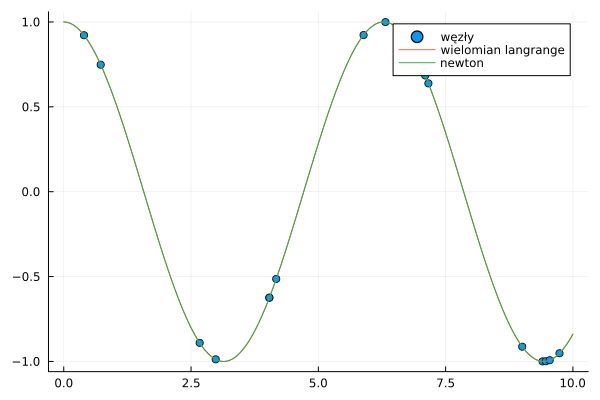

In [8]:
plot!(xs, newton_res, label="newton")

#### Zastosować interpolację wielomianową z pakietu Polynomials do tych samych danych, co w poprzednich punktach. Porównać wszystkie 3 wyniki interpolacji wielomianowej na jednym wykresie. Co zauważamy? Dlaczego? (1 pkt)

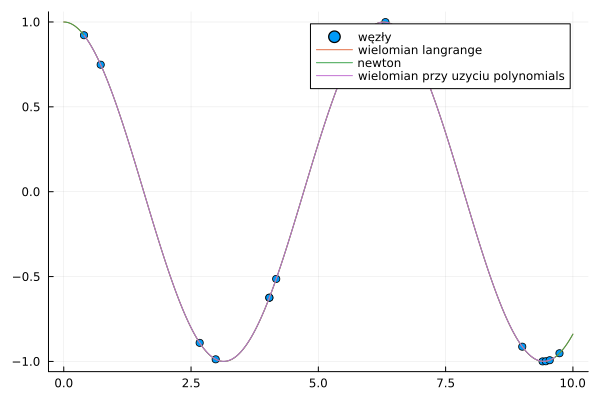

In [9]:
f = fit(x, y)
plot!(f, extrema(x)..., label="wielomian przy uzyciu polynomials")

In [10]:
df = DataFrame(Nodes=Int[], Lagrange=Float64[], NewtonInterpolation=Float64[], Newton=Float64[], PolynomialsInterpolation=Float64[], Polynomials=Float64[])
for i in 5:5:50
    for j in 1:12
        width = 10/i
        x = 0:width:10
        y = cos.(x)
        xs = 0:0.1:10
        lagrange, timeLagrange = @timed [lagrange_interpl(x,y,xi) for xi in xs]
        newtonInterpolation, timeNewtonInterpolation = @timed newton_interpl(x, y)
        newtonRes, timeNewton = @timed [newton(newtonInterpolation, x, xi) for xi in xs]
        polynomialsInterpolation, timePolynomialsInterpolation = @timed fit(x, y)
        polynomials, timePolynomials = @timed [polynomialsInterpolation(xi) for xi in xs]
        if j == 1
            continue
        end
        push!(df, (i, timeLagrange, timeNewtonInterpolation, timeNewton, timePolynomialsInterpolation, timePolynomials))
            
    end
end


In [11]:
df

Row,Nodes,Lagrange,NewtonInterpolation,Newton,PolynomialsInterpolation,Polynomials
,Int64,Float64,Float64,Float64,Float64,Float64
1,5,0.000113875,2.291e-6,1.25e-5,5.541e-6,1.917e-6
2,5,0.000121917,8.33e-7,1.2209e-5,6.083e-6,3.625e-6
3,5,0.000105667,1.292e-6,7.125e-6,1.25e-6,9.17e-7
4,5,0.000103292,5.83e-7,6.708e-6,7.92e-7,7.09e-7
5,5,0.000104791,3.75e-7,6.542e-6,6.25e-7,5.83e-7
6,5,0.000104583,3.75e-7,6.5e-6,5.83e-7,5.83e-7
7,5,0.000103459,3.33e-7,6.5e-6,5.83e-7,5.83e-7
8,5,0.000103625,3.75e-7,6.458e-6,5.42e-7,5.84e-7
9,5,0.000102625,3.34e-7,6.458e-6,5.42e-7,5.83e-7


In [12]:
df_stats = combine(
    groupby(df, :Nodes),
    :Lagrange => mean => :Lagrange_mean,
    :Lagrange => std => :Lagrange_std,
    :NewtonInterpolation => mean => :NewtonInterpolation_mean,
    :NewtonInterpolation => std => :NewtonInterpolation_std,
    :Newton => mean => :Newton_mean,
    :Newton => std => :Newton_std,
    :PolynomialsInterpolation => mean => :PolynomialsInterpolation_mean,
    :PolynomialsInterpolation => std => :PolynomialsInterpolation_std,
    :Polynomials => mean => :Polynomials_mean,
    :Polynomials => std => :Polynomials_std
)

Row,Nodes,Lagrange_mean,Lagrange_std,NewtonInterpolation_mean,NewtonInterpolation_std,Newton_mean,Newton_std,PolynomialsInterpolation_mean,PolynomialsInterpolation_std,Polynomials_mean,Polynomials_std
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,5,0.000106341,6.06447e-6,6.77909e-7,6.13405e-7,7.62873e-6,2.34566e-6,1.60609e-6,2.09316e-6,1.02273e-6,9.50463e-7
2,10,0.0013635,0.00351047,1.11373e-6,5.03353e-7,7.85991e-6,1.95428e-6,1.34845e-6,1.38141e-6,9.28182e-7,4.60718e-7
3,15,0.000583917,3.51657e-5,1.41691e-6,1.35699e-7,7.83336e-6,9.14246e-8,9.65909e-7,4.08692e-8,9.50727e-7,6.13549e-8
4,20,0.0010863,1.18421e-5,2.46591e-6,2.58765e-7,8.47309e-6,7.04123e-8,1.28036e-6,1.38253e-7,1.451e-6,9.5735e-7
5,25,0.00258627,0.00321696,3.86745e-6,1.608e-6,1.02955e-5,1.44567e-6,2.62873e-6,1.4684e-6,1.81055e-6,4.35614e-7
6,30,0.00227408,1.60126e-5,4.14009e-6,3.77546e-7,1.0303e-5,2.77642e-7,2.303e-6,1.64652e-7,1.81045e-6,6.80637e-8
7,35,0.00354546,0.00198198,5.92418e-6,1.81683e-6,1.21136e-5,1.48863e-6,3.43545e-6,9.08376e-7,2.49245e-6,5.24032e-7
8,40,0.00436234,0.00203637,7.66309e-6,1.30286e-6,1.38258e-5,1.30793e-6,4.48864e-6,8.12454e-7,3.10973e-6,6.32903e-7
9,45,0.00595609,0.00261552,9.85236e-6,1.68414e-6,1.58599e-5,1.29853e-6,5.58336e-6,9.86196e-7,3.64391e-6,3.91486e-7


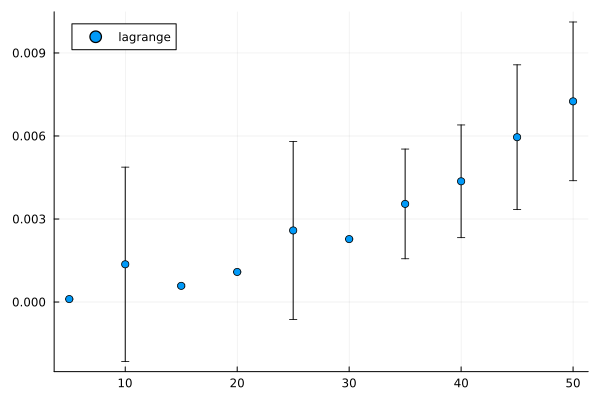

In [13]:
p1 = scatter(df_stats.Nodes, df_stats.Lagrange_mean, yerr=df_stats.Lagrange_std, label="lagrange")

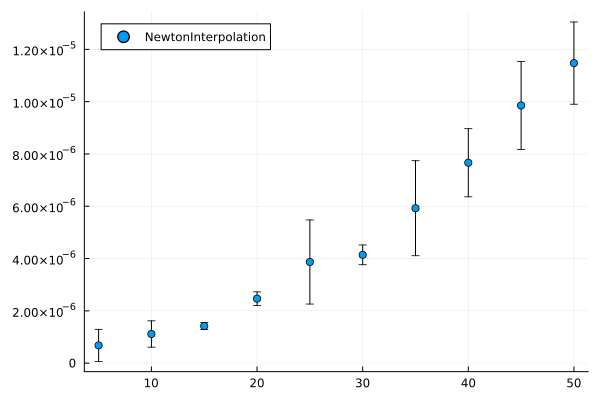

In [14]:
p2 = scatter(df_stats.Nodes, df_stats.NewtonInterpolation_mean, yerr=df_stats.NewtonInterpolation_std, label="NewtonInterpolation")

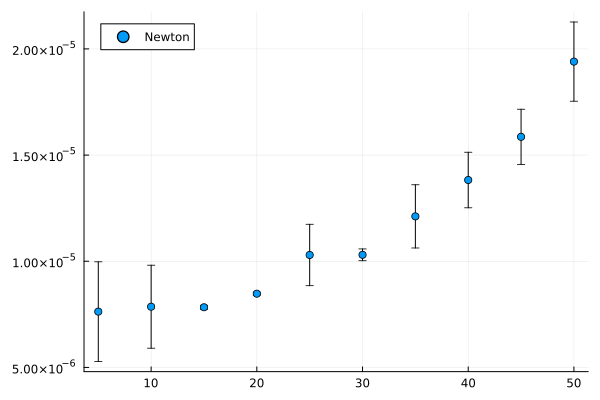

In [15]:
p3 = scatter(df_stats.Nodes, df_stats.Newton_mean, yerr=df_stats.Newton_std, label="Newton")

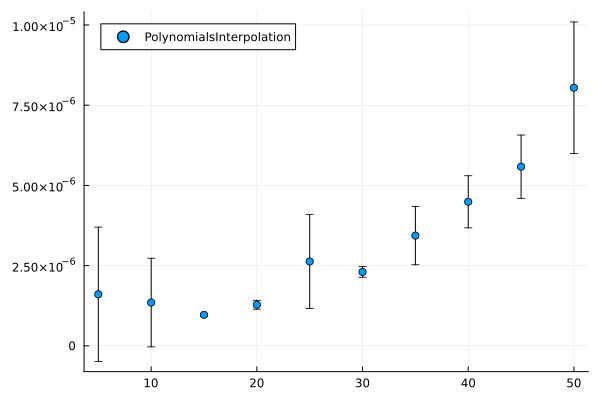

In [16]:
p4 = scatter(df_stats.Nodes, df_stats.PolynomialsInterpolation_mean, yerr=df_stats.PolynomialsInterpolation_std, label="PolynomialsInterpolation")

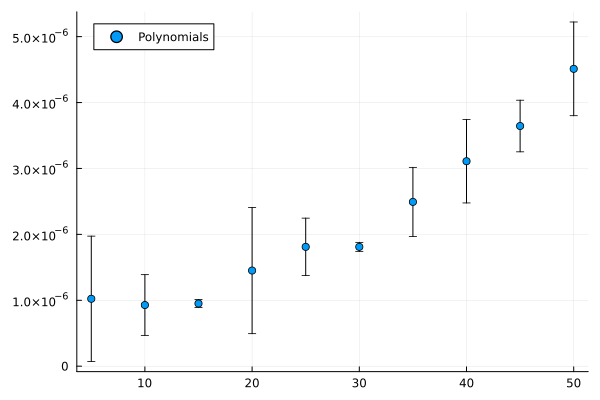

In [17]:
p5 = scatter(df_stats.Nodes, df_stats.Polynomials_mean, yerr=df_stats.Polynomials_std, label="Polynomials")

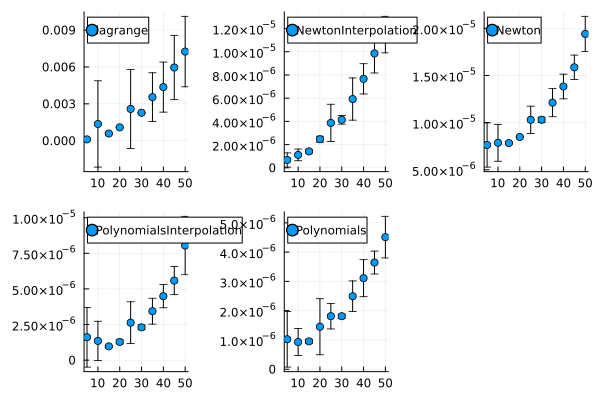

In [18]:
plot(p1,p2,p3,p4,p5,layout=5)